## Workshop Week 6

## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
sns.set_theme()

In [300]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [301]:
# Examine the data: check number of rows and number of columns
bcancer.shape

(699, 11)

In [302]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [303]:
# Check how many classes we do have from the "class" column
bcancer['class'].unique()

array([2, 4])

In [304]:
# Check number of samples for each class and comment whether dataset is balanced?
bcancer['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

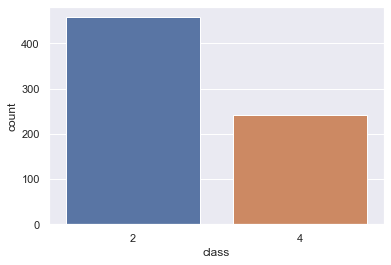

In [305]:
sns.countplot(x=bcancer['class'], label = 'Count')

In [306]:
# Deal with the NaN values in the data
bcancer.dropna(inplace=True)
bcancer

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [307]:
bcancer.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [308]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(bcancer, test_size=0.2, random_state=142)
print('Shape of training and testing set:', train.shape, test.shape)
X_train = train[['clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses']]
y_train = train['class']
X_test = test[[ 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses']]
y_test = test['class']

Shape of training and testing set: (546, 11) (137, 11)


In [309]:
# Build your Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [310]:
# Do predictions on test set
train_predicted = log.predict(X_train)
test_predicted = log.predict(X_test)

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [311]:
# Evaluate the performance of your trained model
print('Accuracy on training set', accuracy_score(y_train, train_predicted))
print('Accuracy on test set', accuracy_score(y_test, test_predicted))

Accuracy on training set 0.9688644688644689
Accuracy on test set 0.9635036496350365


In [312]:
print('Confusion matrix on training set')
print(confusion_matrix(y_train, train_predicted))
print()
print('Confusion matrix on testing set')
print(confusion_matrix(y_test, test_predicted))

Confusion matrix on training set
[[350   9]
 [  8 179]]

Confusion matrix on testing set
[[83  2]
 [ 3 49]]


In [313]:
print('R squared score on training set', r2_score(y_train, train_predicted))
print('R squared score on training set', r2_score(y_test, test_predicted))

R squared score on training set 0.8617371486452267
R squared score on training set 0.8450226244343891


**This is the checkpoint mark for this week's workshop. You need to report `Accuracy Score` on test set and also show `confusion matrix`. You also need to provide analysis based on the results you got.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [314]:
# Create the RFE object and rank each pixel
lmodel = linear_model.LogisticRegression()
selector = RFE(lmodel, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)
trainf_predicted = selector.predict(X_train)
testf_predicted = selector.predict(X_test)

In [315]:
print('Accuracy on training set', accuracy_score(y_train, trainf_predicted))
print('Accuracy on test set', accuracy_score(y_test, testf_predicted))

Accuracy on training set 0.967032967032967
Accuracy on test set 0.9635036496350365


In [316]:
rank = selector.ranking_
rank

array([1, 5, 1, 1, 4, 1, 1, 3, 2])

In [317]:
selected_feature = []
for i in range(len(rank)):
    if rank[i] == 1:
        print('Selected feature:', X_train.columns[i])
        selected_feature.append(X_train.columns[i])

Selected feature: clump_thickness
Selected feature: uniformity_cell_shape
Selected feature: marginal_adhesion
Selected feature: bare_nuclei
Selected feature: bland_chromatin


<AxesSubplot:>

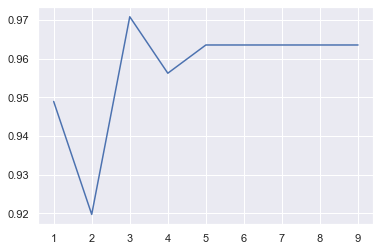

In [318]:
accuracy_scores = []
n_features = []
for i in range(1,10):
    selector = RFE(lmodel, n_features_to_select=i, step=1)
    selector.fit(X_train, y_train)
    test_predicted = selector.predict(X_test)
    n_features.append(i)
    accuracy_scores.append(accuracy_score(y_test, test_predicted))
sns.lineplot(x=n_features, y=accuracy_scores, dashes=True)

## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 